## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from azureml.core import Workspace, Dataset



## Loading Dataset

In [2]:
data = pd.read_csv('../dataset/weather_dataset_raw.csv')

In [3]:
## create a copy of the data
df = data.copy()

## Dataset Preprocessing

In [4]:
## lets give a descriptive statistics of the dataset
df.describe().round()

,S_No,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars
count,96453.0,96453.0,96453.0,96453.0,96453.0,96453.0,96453.0,96453.0
mean,48226.0,12.0,11.0,1.0,11.0,188.0,10.0,1003.0
std,27844.0,10.0,11.0,0.0,7.0,107.0,4.0,117.0
min,0.0,-22.0,-28.0,0.0,0.0,0.0,0.0,0.0
25%,24113.0,5.0,2.0,1.0,6.0,116.0,8.0,1012.0
50%,48226.0,12.0,12.0,1.0,10.0,180.0,10.0,1016.0
75%,72339.0,19.0,19.0,1.0,14.0,290.0,15.0,1021.0
max,96452.0,40.0,39.0,1.0,64.0,359.0,16.0,1046.0


In [5]:
## lets check the formats of each columns
df.dtypes

S_No                        int64
Timestamp                  object
Location                   object
Temperature_C             float64
Apparent_Temperature_C    float64
Humidity                  float64
Wind_speed_kmph           float64
Wind_bearing_degrees        int64
Visibility_km             float64
Pressure_millibars        float64
Weather_conditions         object
dtype: object

In [6]:
## lets convert the datatype of the Timestamp column
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [7]:
## lets check for missing values 
df.isnull().sum()

S_No                      0
Timestamp                 0
Location                  0
Temperature_C             0
Apparent_Temperature_C    0
Humidity                  0
Wind_speed_kmph           0
Wind_bearing_degrees      0
Visibility_km             0
Pressure_millibars        0
Weather_conditions        5
dtype: int64

In [8]:
## lets fill the missing values in the Weather_conditions columns
## using the forward fill (ffill) method
df['Weather_conditions'].fillna(method='ffill', inplace=True, axis=0)

### Label Encoding

In [9]:
df['Weather_conditions'].value_counts()

rain     82271
snow     10712
clear     3470
Name: Weather_conditions, dtype: int64

In [10]:
df['Weather_conditions'].replace({"snow": "no_rain", "clear": "no_rain"}, inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = df['Weather_conditions']
y = le.fit_transform(y)

y = pd.DataFrame(data=y, columns=['Current_weather_condition'])
df = pd.concat([df,y], axis=1)

df.drop(['Weather_conditions'], axis=1, inplace=True)

In [12]:
df.head()

,S_No,Timestamp,Location,Temperature_C,Apparent_Temperature_C,Humidity,Wind_speed_kmph,Wind_bearing_degrees,Visibility_km,Pressure_millibars,Current_weather_condition
0,0,2006-04-01 00:00:00+02:00,"Port of Turku, Finland",9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,1
1,1,2006-04-01 01:00:00+02:00,"Port of Turku, Finland",9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,1
2,2,2006-04-01 02:00:00+02:00,"Port of Turku, Finland",9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,1
3,3,2006-04-01 03:00:00+02:00,"Port of Turku, Finland",8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,1
4,4,2006-04-01 04:00:00+02:00,"Port of Turku, Finland",8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,1


In [13]:
## lets create a new feature by shiffting the the Current_weather_condition by four rows
df['Future_weather_condition'] = df['Current_weather_condition'].shift(4, axis=0)
df.dropna(inplace=True)

## Exploratory Data Analysis

/tmp/ipykernel_10710/796831693.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')
/tmp/ipykernel_10710/796831693.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


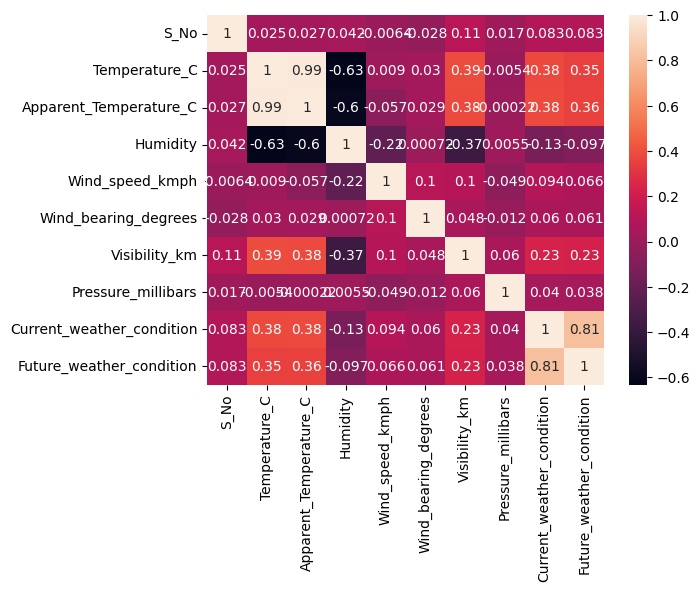

In [17]:
## lets compute the correlation 
df.corr(method='pearson')

## Visualizing using heatmap
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()